In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import argparse
import os

In [2]:
# What I want to do: 
# Create python code that is executable on the command line (split_VPs.py) and takes the following arguments: 
# sample_name
# r9_modkit (bedfile)
# r10_modkit (bedfile)
# graph_binning (file to bin intervals and graph by - either R9 or R10)
# binning_intervals (inervals to bin the data by - ex. tens (0, 10, 20, 30... 100) or twenties (0, 20, 40...100))
# cov_min (minimum coverage, default = 20)
# cov_max (maximum coverage, default = None)
# --help message explaining what these things are

In [3]:
sample = 'HG002'
select = {"chr1", "chr2", "chr3", "chr4",'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM'}

In [4]:
print("Reading R9 data...")
R9 = pd.read_csv("/Users/gennerrm/Desktop/modkit_files/HG002_R9.hg38.modkit.comb.bed", sep="\t", header=None, engine="c",
    usecols=["chrom", "start", "end", "coverage", "freq", "mod", "canon"],
    dtype={
        "chrom":str, "start":int, "end":int, "name":str, "score":int, "strand":str,
        "start2":int, "end2":int, "color":str,
        "coverage":int, "freq":float, "mod":int, "canon":int, "other_mod":int, 'delete':int, 'fail':int, 'diff':int, 'no_call':int},
    names=[
        "chrom", "start", "end", "name", "score", "strand",
        "start2", "end2", "color",
        "coverage", "freq", "mod", "canon", "other_mod", "delete", "fail", 'diff', 'no_call'])

R9

Reading R9 data...


,chrom,start,end,coverage,freq,mod,canon
0,chr1,10468,10469,118,87.29,103,15
1,chr1,10470,10471,112,89.29,100,12
2,chr1,10483,10484,112,91.96,103,9
3,chr1,10488,10489,129,96.12,124,5
4,chr1,10492,10493,122,91.80,112,10
...,...,...,...,...,...,...,...
28941572,chrEBV,171755,171756,150,14.00,21,129
28941573,chrEBV,171765,171766,208,12.50,26,182
28941574,chrEBV,171780,171781,41,24.39,10,31
28941575,chrEBV,171797,171798,22,22.73,5,17


In [5]:
#filter for  chromosomes 1-22,X,Y,M and coverage > 20 and < 200

R9 = R9.loc[
    (R9['chrom'].isin(select)) &
    (R9['coverage'] > 20) &
    (R9['coverage'] < 200)]

R9

,chrom,start,end,coverage,freq,mod,canon
0,chr1,10468,10469,118,87.29,103,15
1,chr1,10470,10471,112,89.29,100,12
2,chr1,10483,10484,112,91.96,103,9
3,chr1,10488,10489,129,96.12,124,5
4,chr1,10492,10493,122,91.80,112,10
...,...,...,...,...,...,...,...
28797589,chrY,56887220,56887221,50,98.00,49,1
28797590,chrY,56887399,56887400,45,93.33,42,3
28797591,chrY,56887579,56887580,43,97.67,42,1
28797592,chrY,56887700,56887701,42,23.81,10,32


In [6]:
print("Reading R10 data...")
R10 = pd.read_csv(
    "/Users/gennerrm/Desktop/modkit_files/HG002_R10.hg38.modkit.comb.bed",
    sep="\t", header=None, engine="c",
    usecols=["chrom", "start", "end", "coverage", "freq", "mod", "canon"],
    dtype={
        "chrom":str, "start":int, "end":int, "name":str, "score":int, "strand":str,
        "start2":int, "end2":int, "color":str,
        "coverage":int, "freq":float, "mod":int, "canon":int, "other_mod":int, 'delete':int, 'fail':int, 'diff':int, 'no_call':int},
    names=[
        "chrom", "start", "end", "name", "score", "strand",
        "start2", "end2", "color",
        "coverage", "freq", "mod", "canon", "other_mod", "delete", "fail", 'diff', 'no_call'])

#filter for coverage > 20 and < 200
R10 = R10.loc[
    (R10['chrom'].isin(select)) &
    (R10['coverage'] > 20) &
    (R10['coverage'] < 200)]

R10

Reading R10 data...


,chrom,start,end,coverage,freq,mod,canon
0,chr1,10468,10469,80,97.50,78,2
1,chr1,10470,10471,82,95.12,78,4
2,chr1,10483,10484,92,95.65,88,4
3,chr1,10488,10489,98,100.00,98,0
4,chr1,10492,10493,111,99.10,110,1
...,...,...,...,...,...,...,...
28759848,chrY,56887098,56887099,89,94.38,84,5
28759849,chrY,56887220,56887221,68,100.00,68,0
28759850,chrY,56887399,56887400,68,98.53,67,1
28759851,chrY,56887579,56887580,66,100.00,66,0


In [7]:
# inner merge to get dataframe with CpG sites that are shared between R9 and R10
inner = pd.merge(R9, R10, how="inner", on=["chrom", "start", "end"], suffixes=[".R9", ".R10"])
inner

,chrom,start,end,coverage.R9,freq.R9,mod.R9,canon.R9,coverage.R10,freq.R10,mod.R10,canon.R10
0,chr1,10468,10469,118,87.29,103,15,80,97.50,78,2
1,chr1,10470,10471,112,89.29,100,12,82,95.12,78,4
2,chr1,10483,10484,112,91.96,103,9,92,95.65,88,4
3,chr1,10488,10489,129,96.12,124,5,98,100.00,98,0
4,chr1,10492,10493,122,91.80,112,10,111,99.10,110,1
...,...,...,...,...,...,...,...,...,...,...,...
25042706,chrY,56887098,56887099,58,87.93,51,7,89,94.38,84,5
25042707,chrY,56887220,56887221,50,98.00,49,1,68,100.00,68,0
25042708,chrY,56887399,56887400,45,93.33,42,3,68,98.53,67,1
25042709,chrY,56887579,56887580,43,97.67,42,1,66,100.00,66,0


In [8]:
# Create list (bins) of integers within given increment and range, ex. bins_10 is increments of 10 from 0-100
 
bins_10 = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# tried to make a function for this and it didn't work?
def binning(binning_interval):
    return list(range(0, 101, binning_interval))    


bins = print(binning(10))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [9]:
#make subset dataframe with R9 and R10 frequency columns 
freqs = inner[['freq.R9', 'freq.R10']]

# this adds a column that rounds up each R9 methylation frequency to the tenths place - ex. 87.3.5 -> 90.0, and assigns the corresponding R10 value to that same interval regardless of its value
# This is binning the intervals according to R9. Could also bin by R10 by switching it to pd.cut(freqs['freq.R10'])

freqs['ints'] = pd.cut(freqs['freq.R9'], bins=bins_10)

#convert df from int to str
freqs = freqs.astype({'ints':'string'})

#delete the start value of the interval so it's just one number - so (90.0, 100.0] becomes 100 - and then convert back to float 
freqs['ints'] = freqs['ints'].str[1:-1]
freqs[['int_start', 'int_end']] = freqs.ints.str.split(',', expand=True)
freqs['int_end'] = freqs['int_end'].astype(float)

#grab only these columns 
freqs = freqs[['freq.R9', 'freq.R10', 'int_end']]

freqs

/var/folders/j1/3pvq78vd5lvcvg4f6v4ct63w44fvfw/T/ipykernel_42075/945713376.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freqs['ints'] = pd.cut(freqs['freq.R9'], bins=bins_10)


,freq.R9,freq.R10,int_end
0,87.29,97.50,90.0
1,89.29,95.12,90.0
2,91.96,95.65,100.0
3,96.12,100.00,100.0
4,91.80,99.10,100.0
...,...,...,...
25042706,87.93,94.38,90.0
25042707,98.00,100.00,100.0
25042708,93.33,98.53,100.0
25042709,97.67,100.00,100.0


In [10]:
# add two columns with R9 and R10 for when I separate them out later 
freqs.insert(1, 'R9', 'R9')
freqs.insert(2, 'R10', 'R10')
freqs

,freq.R9,R9,R10,freq.R10,int_end
0,87.29,R9,R10,97.50,90.0
1,89.29,R9,R10,95.12,90.0
2,91.96,R9,R10,95.65,100.0
3,96.12,R9,R10,100.00,100.0
4,91.80,R9,R10,99.10,100.0
...,...,...,...,...,...
25042706,87.93,R9,R10,94.38,90.0
25042707,98.00,R9,R10,100.00,100.0
25042708,93.33,R9,R10,98.53,100.0
25042709,97.67,R9,R10,100.00,100.0


In [26]:
keys = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

freqs_dict = {}
R9_freqs = {}
R10_freqs = {}
R9_R10_combined={}
names = []

for key in keys: 
    freqs_dict[key] = freqs.loc[freqs['int_end'] == float(key)]
    for row in freqs_dict:
        R9_freqs[key] = freqs_dict[key][['R9','freq.R9', 'int_end']]
        R9_freqs[key] = R9_freqs[key].rename(columns={'R9':'R', 'freq.R9':'freq'})
        R10_freqs[key] = freqs_dict[key][['R10','freq.R10', 'int_end']]
        R10_freqs[key] = R10_freqs[key].rename(columns={'R10':'R', 'freq.R10':'freq'})
    names.append('R9_freqs[' + str(key) + ']' )
    names.append('R10_freqs[' + str(key) + ']' )

    
names       

#R9_R10_combined = pd.concat([print(names)], axis=0)

R9_R10_combined = pd.concat([R9_freqs[10], R9_freqs[20], R9_freqs[30], R9_freqs[40], R9_freqs[50], R9_freqs[60], R9_freqs[70], R9_freqs[80], R9_freqs[90], R9_freqs[100], R10_freqs[10], R10_freqs[20], R10_freqs[30], R10_freqs[40], R10_freqs[50], R10_freqs[60], R10_freqs[70], R10_freqs[80], R10_freqs[90], R10_freqs[100]],axis=0)


R9_R10_combined



,R,freq,int_end
321,R9,7.63,10.0
425,R9,7.59,10.0
426,R9,6.38,10.0
427,R9,3.06,10.0
428,R9,7.81,10.0
...,...,...,...
25042680,R10,86.32,100.0
25042691,R10,94.44,100.0
25042707,R10,100.00,100.0
25042708,R10,98.53,100.0


/Users/gennerrm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gennerrm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gennerrm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gennerrm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

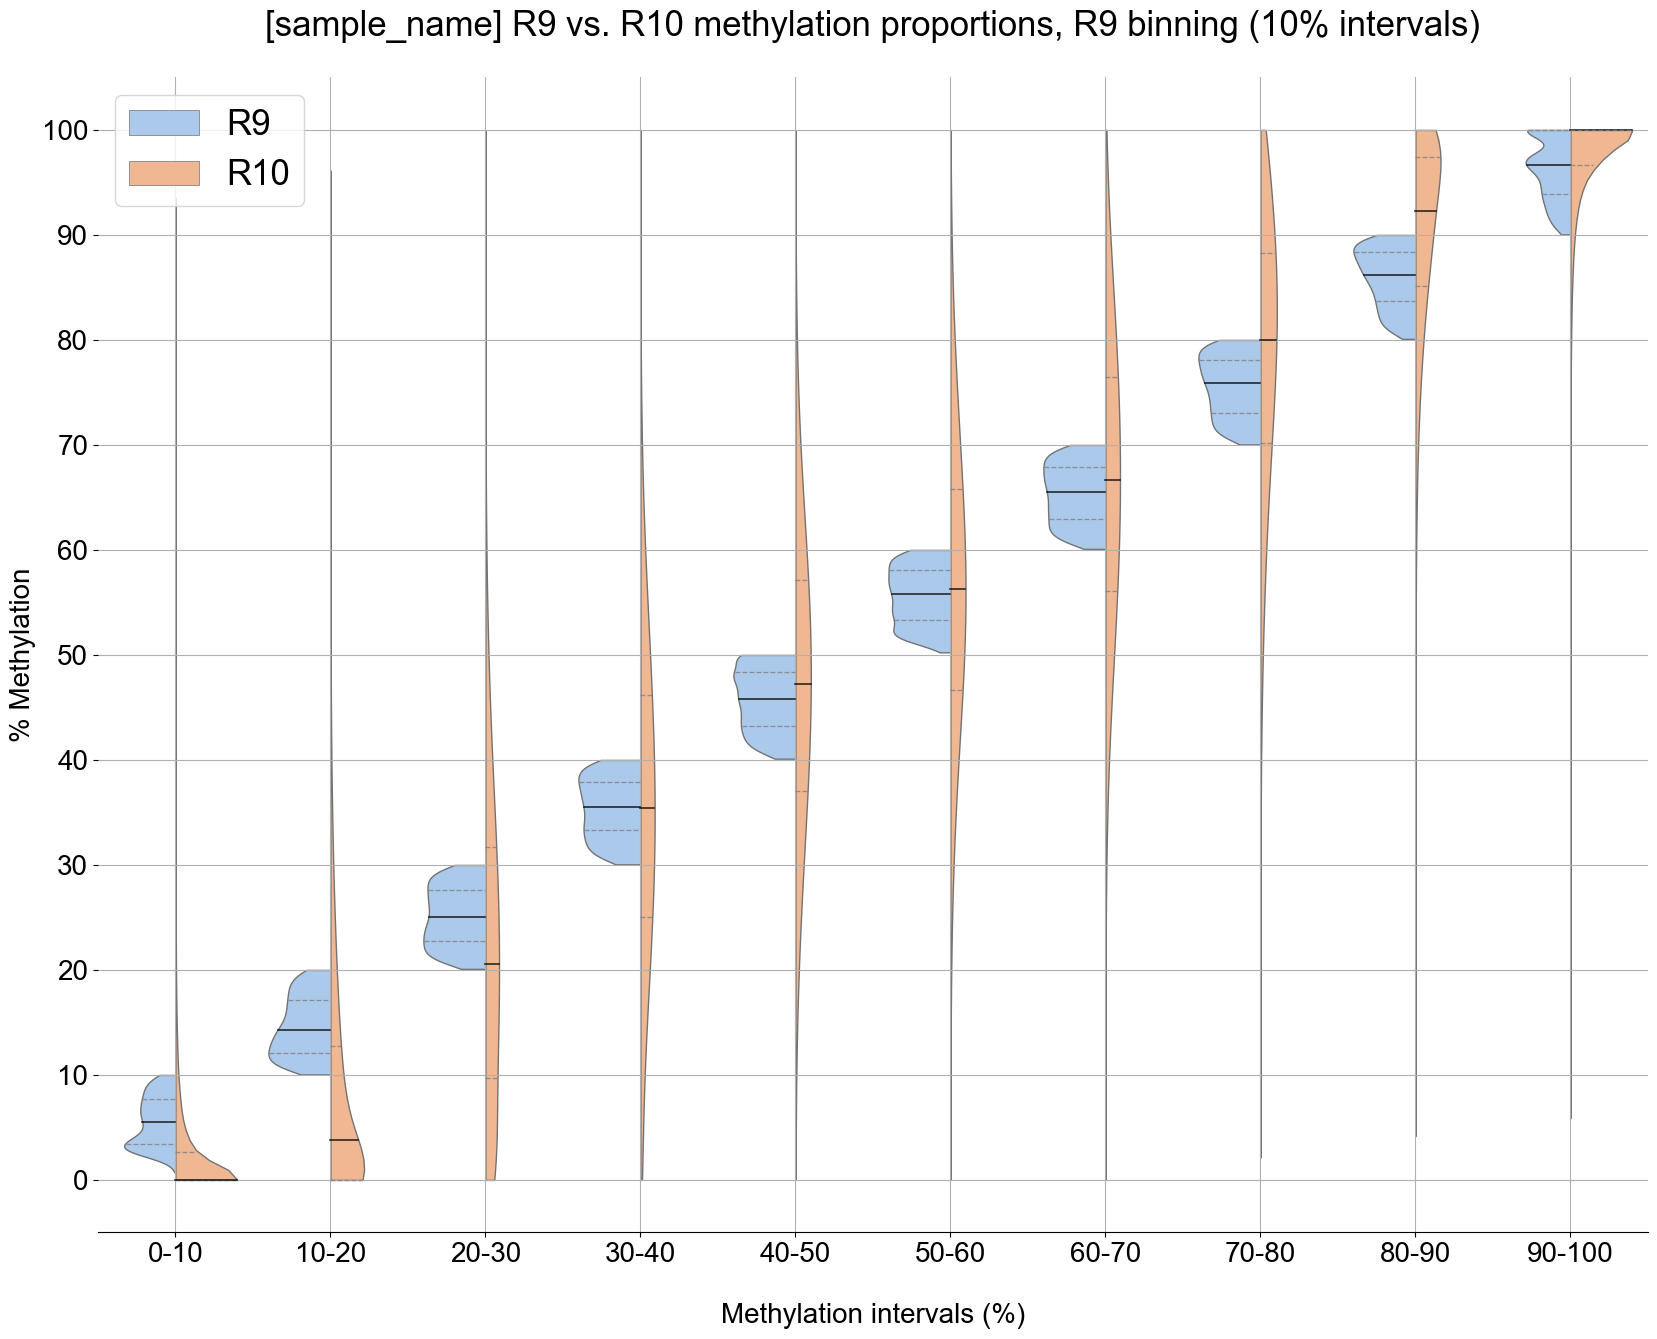

In [27]:
axis = 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# x axis label
axis_10 = (["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100"])

fig, ax = plt.subplots(figsize=(20, 15))

sns.violinplot(data=R9_R10_combined, x="int_end", y="freq", hue='R', split='TRUE', cut=0, inner='quartile', linewidth=1, bw=0.3, ax=ax, palette="pastel")

ax.set_yticks(axis)
ax.set_yticklabels(axis, fontsize=20)
ax.set_xticklabels(axis_10, fontsize=20)
ax.set_xlabel("Methylation intervals (%)", fontsize=20, labelpad=25)
ax.set_ylabel("% Methylation", fontsize=20)
plt.grid()
plt.legend(fontsize=25)
plt.title("[sample_name] R9 vs. R10 methylation proportions, R9 binning (10% intervals)", fontsize=25, pad=30)
sns.despine(left=True)
sns.set(style="whitegrid")

#change color, thickness and style of quartile lines
for l in ax.lines:
    l.set_linestyle('--')
    l.set_linewidth(0.95)
    l.set_color('grey')
    l.set_alpha(0.8)
for l in ax.lines[1::3]:
    l.set_linestyle('-')
    l.set_linewidth(1.2)
    l.set_color('black')
    l.set_alpha(0.8)
    
plt.savefig('/Users/gennerrm/Desktop/figs/sample_name_VP.jpg', dpi=300)
#plt.savefig('/Users/gennerrm/Desktop/figs/NABEC_R9_bin_split_VP.pdf', dpi=300)
#plt.savefig('/Users/gennerrm/Desktop/figs/NABEC_R9_bin_split_VP.svg', dpi=300)

plt.show()


Code for side graph with methylation distribution

/Users/gennerrm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gennerrm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gennerrm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gennerrm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

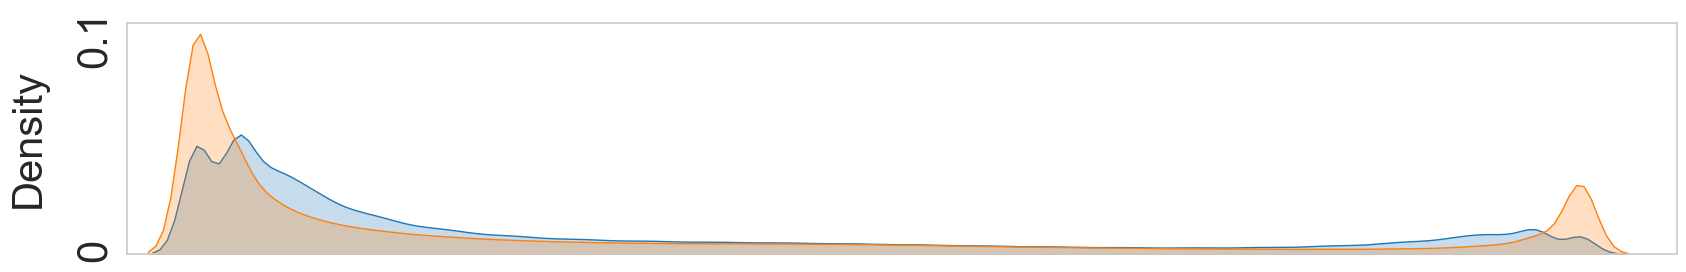

In [28]:
# the graph has to be rotated since it will be added to the side of the violin plot, so axis labels are descending instead of ascending
axis_labels = (['100', '90', '80', '70', '60', '50', '40', '30', '20', '10', '0'])

sns.set_palette("pastel")
sns.set_style("whitegrid", {'axes.grid' : False})

fig, ax = plt.subplots(figsize=(20, 3))
sns.kdeplot(inner['freq.R9'], ax=ax, label='R9', color='tab:blue', fill=True)
sns.kdeplot(inner['freq.R10'], ax=ax, label='R10', color='tab:orange', fill=True)

#ax.set_xticks((100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0))
#ax.set_xticklabels(('100', '90', '80', '70', '60', '50', '40', '30', '20', '10', '0'), fontsize=30)
ax.set_yticks((0.00, 0.10))
ax.set_yticklabels(('0', '0.1'), fontsize=30)


# graph has to be rotated
ax.tick_params(axis='y', labelrotation = 90)

#set x axis limit
ax.set_xlim(105, -7)

plt.xticks(visible=False)
ax.set_ylabel('Density', fontsize=30, labelpad=20)
ax.set_xlabel(None)

#plt.savefig('/Users/gennerrm/Desktop/figs/NABEC_R9_bin_split_VP_cov.jpg', dpi=300)
#plt.savefig('/Users/gennerrm/Desktop/figs/NABEC_R9_bin_split_VP_cov.pdf', dpi=300)
#plt.savefig('/Users/gennerrm/Desktop/figs/NABEC_R9_bin_split_VP_cov.svg', dpi=300)

plt.show()


